# Apriori

`Apriori` Algorithm is used for association rule mining.  
It is used to analyze the `purchasing behaviour` of customers. for eaxample if,
any person buys `green tea` then there's high chance that it will also going to buy `honey`.

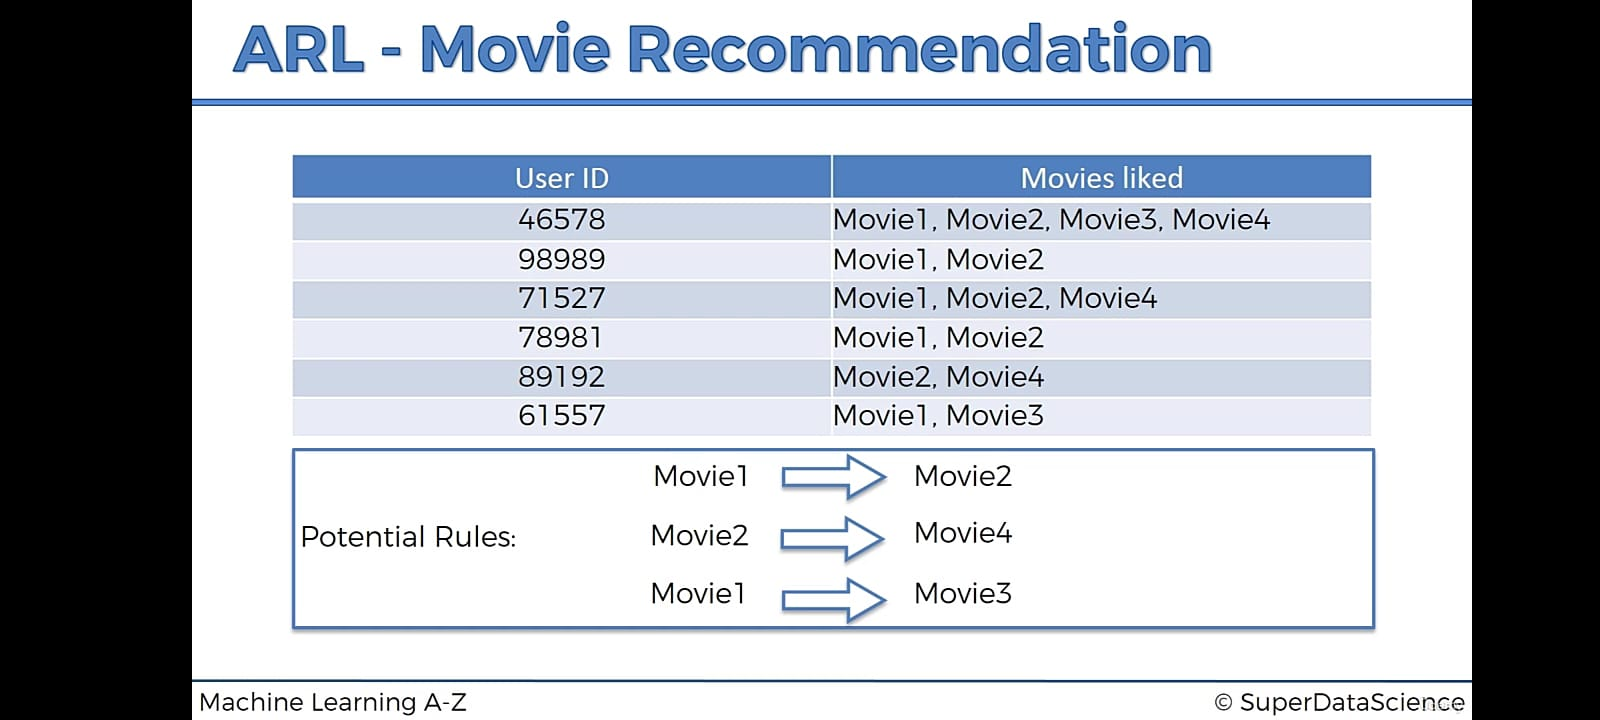

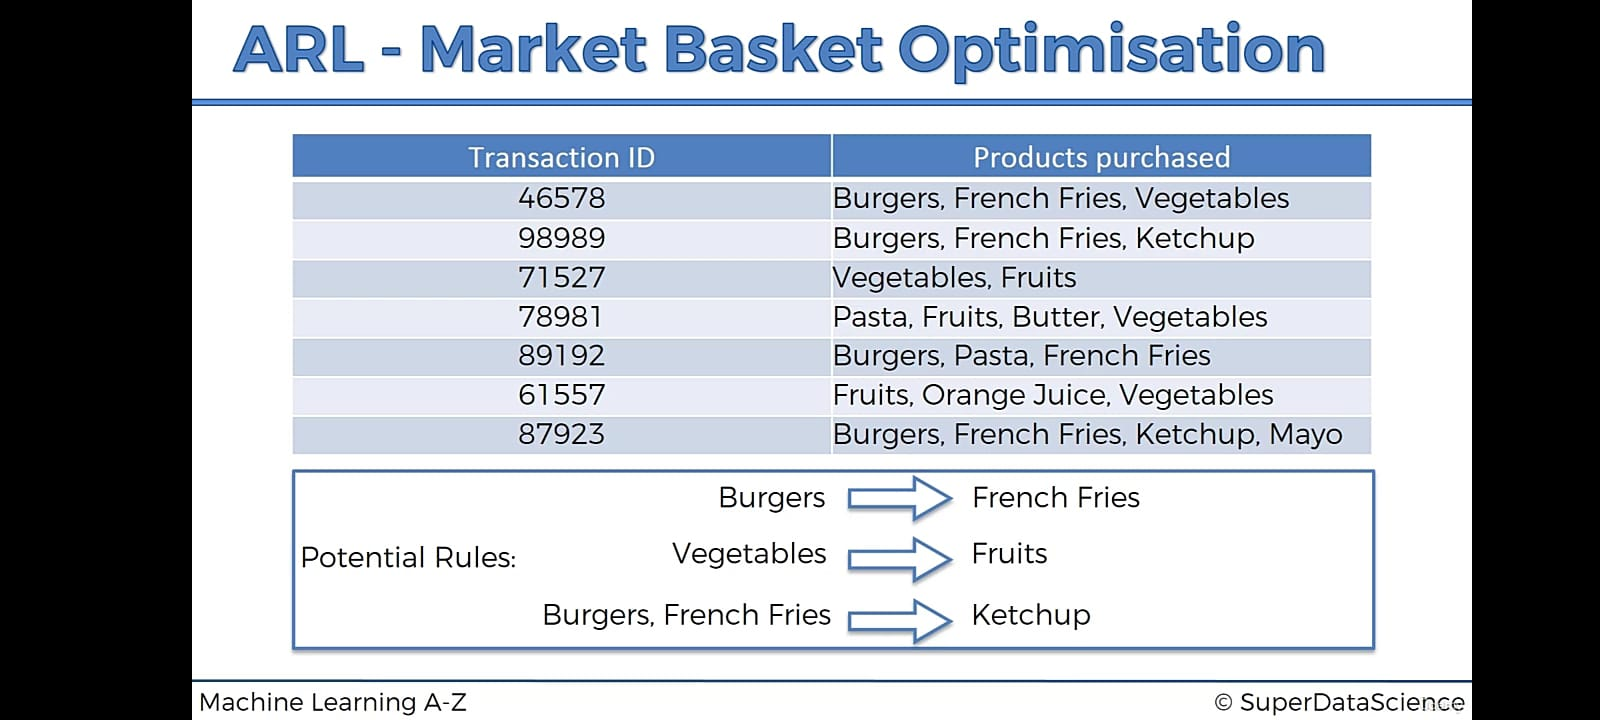

Apriori Algorithm contains three parts:
- Support
- Confidence
-Lift

## Support

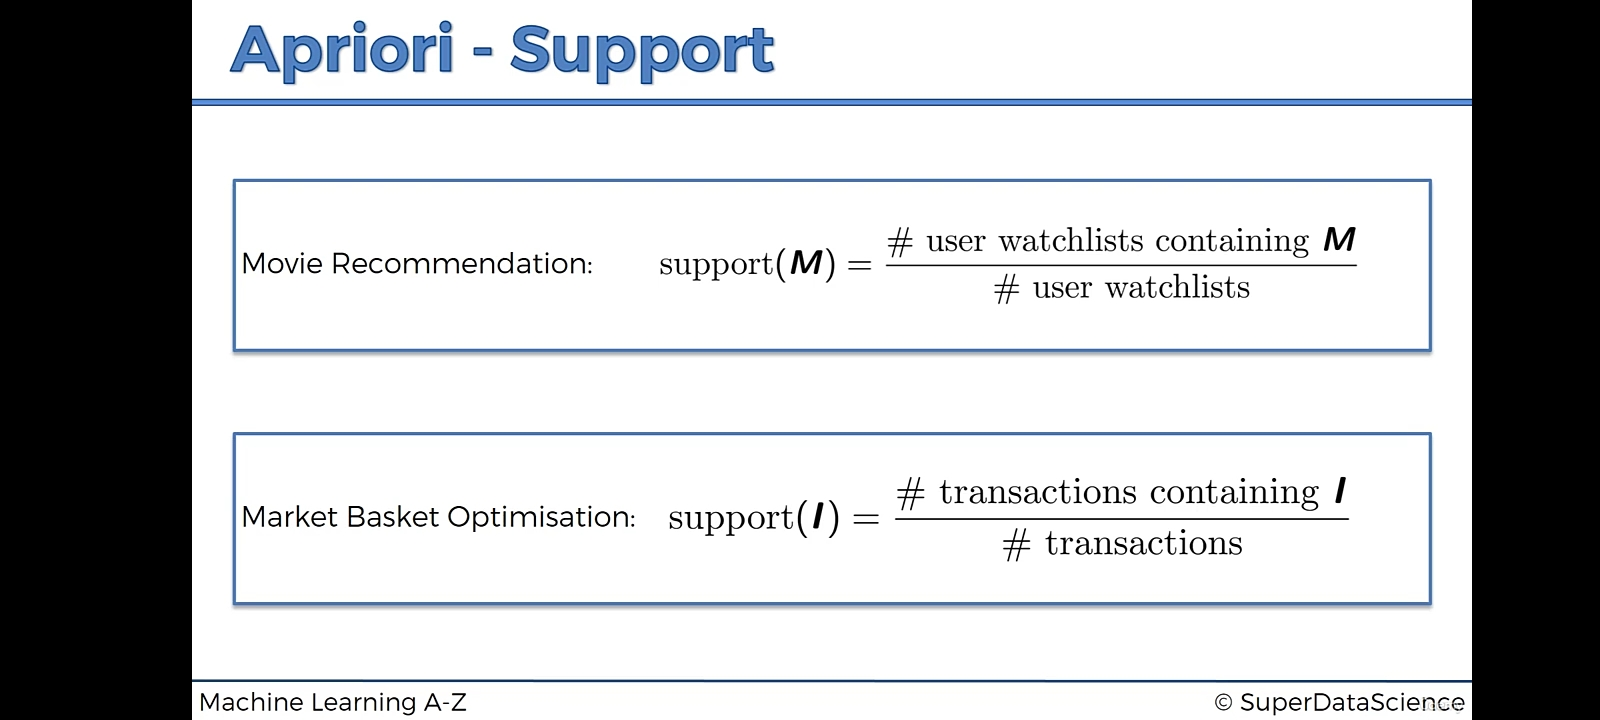

### Example

Suppose there are 100 people, Consider there are 10 people who have seen `X-machina` movie.
So here,
`Support = 10/100 = 10%`

## Confidence

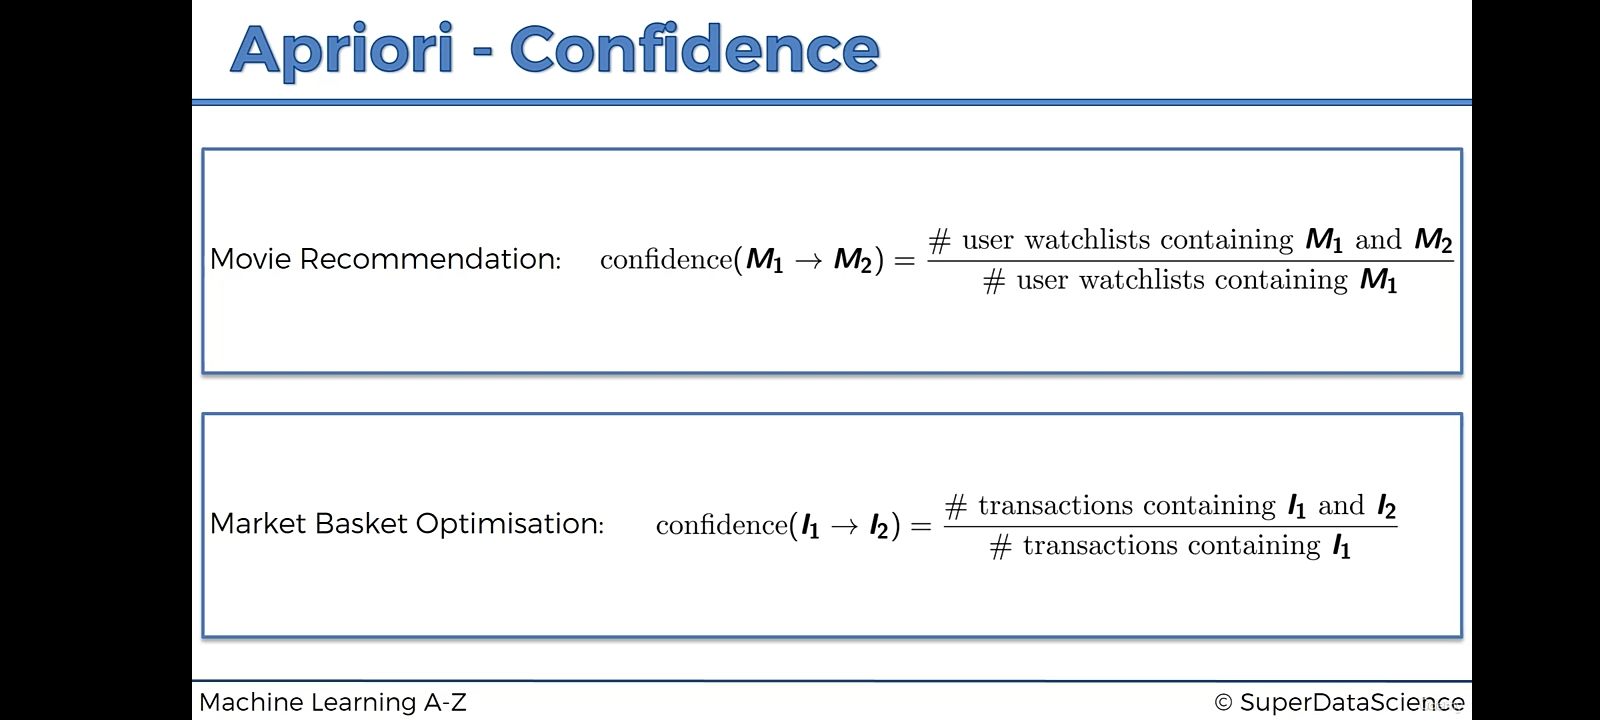

#### Example

Now, suppose there are 100 people and 40 of them have watched `intersteller` movie and we have to check how many of these 40 people will also likely to have seen `X-machina` movie. Cosider there are only 7 people who have seen `X-machina`.  
So, confidence will be:  
`Confidence = 7/40 = 17.5%`


## Lift

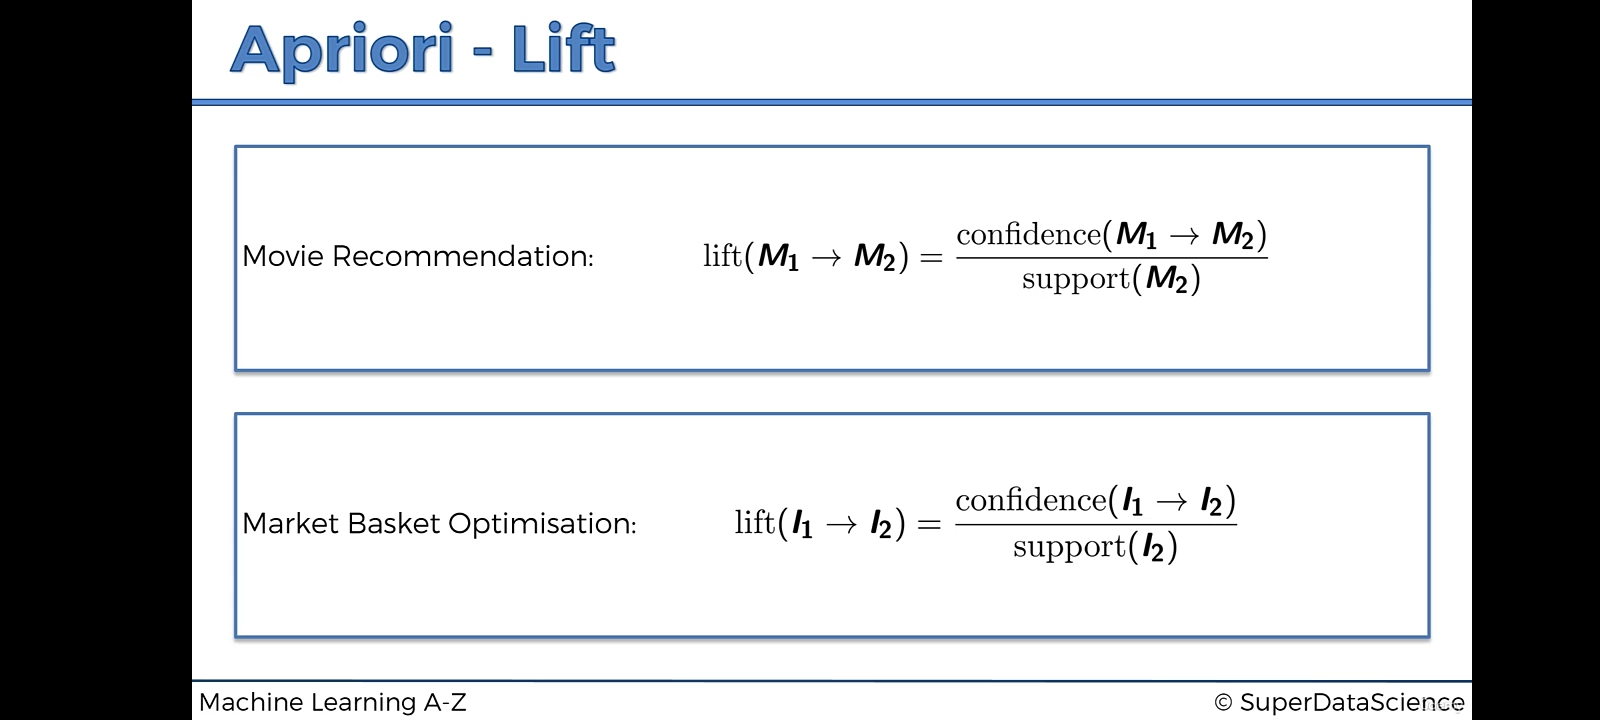

`Lift` is the improvement in your likelyhood.

#### Example

suppose, out of 100 people you recommended `X-machina` randomly and only `10%` people liked it.  
Now, you decided to recommend it again but this time, you first asked the question `have you watched the movie intersteller?` and if the person says `yes` then only you recommend this `X-machina`. and this time `17.5%` people liked the movie.  
So, `Lift = 17.5%/10% = 1.75`.

## Algorithm

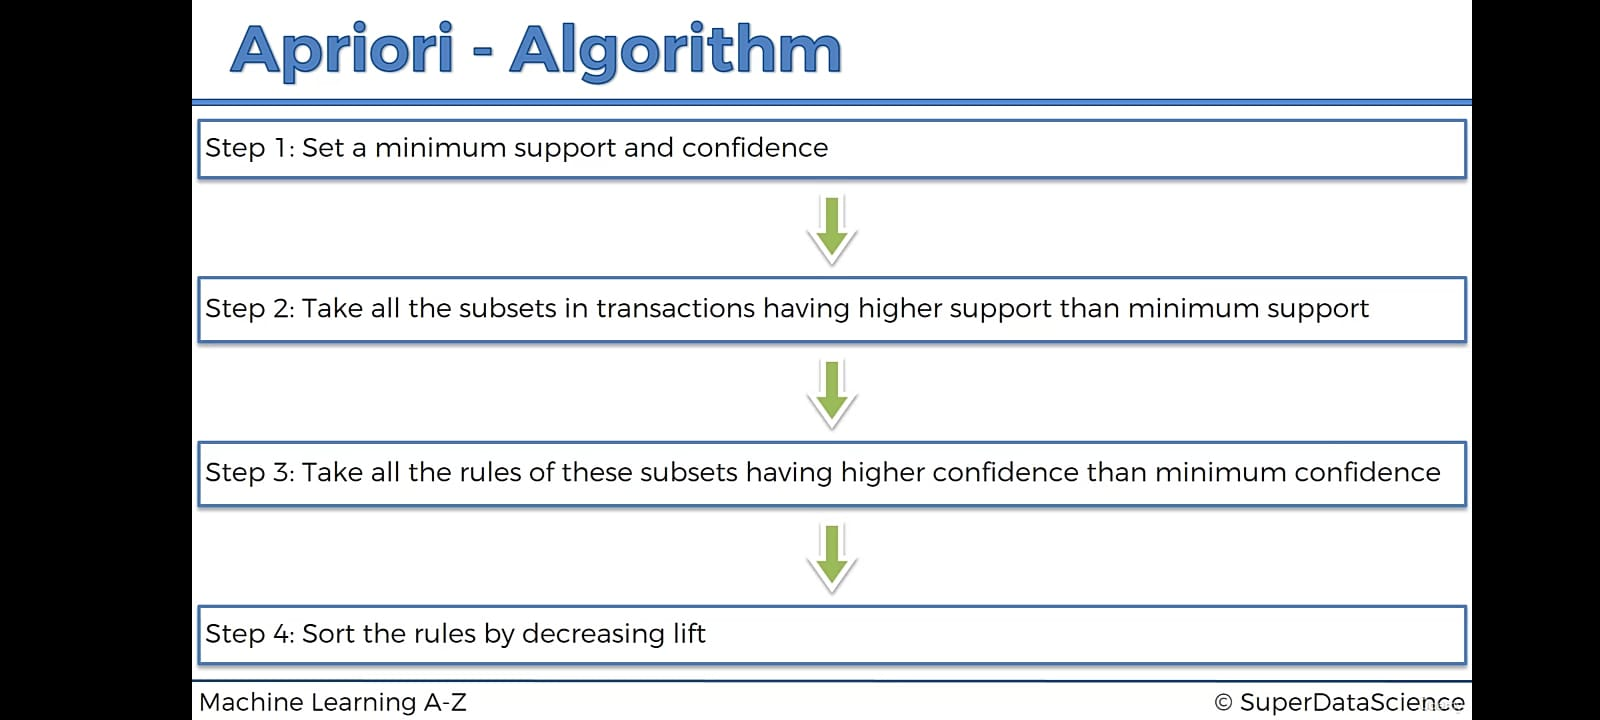

## Implementation

### Importing the Libraries

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=e92084602a281182d001706cc280155fabd2bd107081d912d856f382553b9443
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preprocessing

In [ ]:
dataset = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None) # "header=None" tells that there is no header in dataset

The `apriori` function does not take the data in form of `dataframe`, it takes in form of `list`.  
So, we have to convert the data into form of list.

In [ ]:
transactions = []
for i in range(0, 7501): # there are 7500 rows in dataset.
  transactions.append([str(dataset.values[i, j]) for j in range(0,20)]) # "str()" function to make sure that all the values are in string format.

In [ ]:
print(transactions[0])

['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil']


In [ ]:
print(transactions[1])

['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


### Training the Apriori model on the dataset.

In [ ]:
from apyori import apriori
rules = apriori(transactions=transactions, min_support=0.003, min_confidence=0.2, min_lift = 3, min_length=2, max_length=2)

`min_support = (3*7)/7501`
- 3 --> this represents the minimum transactions in which the products should appear.  
`Matlab, ek Din me jitne bhi transactions ho rahe hai, agar unme se kisi bhi 3 transactions me koi bhi same product appear ho raha hai, to uss product ko frequent mana jayega.`
- 7 --> Since, the dataset contains the transactions of 7 days. So `3*7` is the minimum amount of time we want the product to appear.
- therefore, (3*7)/7501 = 0.003

`min_confidence=0.8`, it is default.  
IF this does not forms any rule, then  
min_confidence = 0.8/2 = 0.4  
Again, if this also does not form any rule then  
min_confidence = 0.4/2 = 0.2 and so on..

`min_lift = 3`.  
- the good lift should always be grater than or equal to 3.
- If it's less than 3 then it will not form any good rules.

`min_length` and `max_length`
- this defines the minimum and maximum number of elements(left or right) you want to have in your rule.

Example:
Buy `one` product and get `one` product for free.

### Visualizing the results

#### Displaying the first results coming directly from the output of the apriori function

In [ ]:
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

- `item_base` represents the `left hand side` of the rule and `item_add` represents `right hand side` of the rule
- So, in first list, `item_base = light cream` and `item_add = chicken`. This means if the person by `light cream` then there is high chance that he will buy `chicken`.
- the high chance is measured by `confidence`. So, the chances of buy chicken is `29%`

#### Putting the results well organised into a Pandas DataFrame

In [ ]:
def inspect(results):
  lhs         =  [tuple(result[2][0][0])[0] for result in results]
  rhs         =  [tuple(result[2][0][1])[0] for result in results]
  supports    =  [result[1] for result in results]
  confidences =  [result[2][0][2] for result in results]
  lifts       =  [result[2][0][3] for result in results]
  return list(zip(lhs, rhs, supports, confidences, lifts))

resultsInDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

#### Displaying the reuslts non sorted

In [ ]:
resultsInDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


#### Displaying the results in descending order.

In [ ]:
resultsInDataFrame.nlargest(n=10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710
